# HIV Model

Arwen Sadler

In [78]:
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import everything from SymPy.
from modsim import *

# Set up Jupyter notebook to display math.
init_printing() 

In [79]:
from sympy.printing import latex

def show(expr, show_latex=False):
    """Display a SymPy expression.
    
    expr: SymPy expression
    show_latex: boolean
    """
    if show_latex:
        print(latex(expr))
    return expr

In [80]:
#Set up all the symbols for the equations--I might not need this to actually write the function
R = symbols('R')
t = symbols('t')
dRdt = diff(R(t),t)
gamma = symbols('Gamma')
tau = symbols('tau')
mu = symbols('mu')
beta = symbols('beta')
V = symbols('V')
L = symbols('L')
dLdt = diff(L(t), t)
rho = symbols('rho')
alpha = symbols('alpha')
E = symbols('E')
dEdt = diff(E(t), t)
delta = symbols('delta')
dVdt = diff(V(t),t)
pi = symbols('pi')
sigma = symbols('sigma')

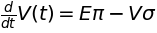

In [81]:
#Set up the equations--I might not need this to actually write the function
dRdt = Eq(dRdt, gamma*tau - mu*R - beta*R*V)
dLdt = Eq(dLdt, rho*beta*R*V - mu*L - alpha*L)
dEdt = Eq(dEdt, (1-rho)*beta*R*V + alpha*L - delta*E)
dVdt = Eq(dVdt, pi*E - sigma*V)

In [90]:
#Set up the state variable
state = State(R=1000,
             L=0,
             E=0,
             V=0.0000004,
             t_0 = 0,
             t_end = 120)

,values
R,1.000000e+03
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07
t_0,0.000000e+00
t_end,1.200000e+02


In [83]:
#Set up the system object
system = System(gamma = 1.36,
                mu = 0.00136,
                tau = 0.2,
                beta = 0.00027/V,
                rho = 0.1,
                alpha = 0.036,
                sigma = 2,
                delta = 0.33,
                pi = 100)

,values
gamma,1.36
mu,0.00136
tau,0.2
beta,0.00027/V
rho,0.1
alpha,0.036
sigma,2
delta,0.33
pi,100


In [87]:
def update_func(state, system):
    '''Update the HIV model
    
    state : State(r, l, e, v)
    t: time
    system: System object
    
    returns: State(RLEV)'''
    
    r, l, e, v = state
    
    dRdt = gamma*tau - mu*r - beta*r*v
    dLdt = rho*beta*r*v - mu*l - alpha*l
    dEdt = (1-rho)*beta*r*v + alpha*l - delta*e
    dVdt = pi*e - sigma*v
    
    r += dRdt
    l += dLdt
    e += dEdt
    v += dVdt
    
    return State(R=r, L=l, E=e, V=v)